<a href="https://colab.research.google.com/github/100496633/100496633_100496072_Aprendizaje/blob/main/01_EDA_Modelado_100496633_100496072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

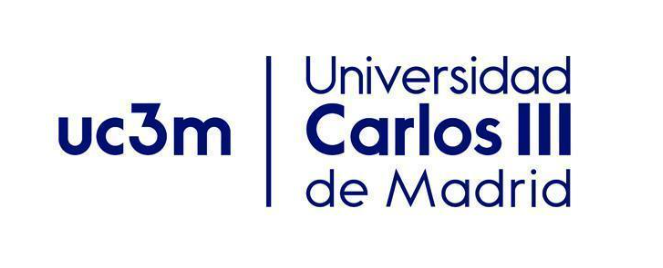

#IDENTIFICACIÓN DE GRUPO

GRUPO 81
<br>
Marcos Romo Poveda, 100496072
<br>
Luca Petidier Iglesias, 100496633
<br>
Enlace al Repositorio: [Pincha Aquí](https://github.com/100496633/100496633_100496072_Aprendizaje)

#  EDA SIMPLIFICADO

In [63]:
#Imports necesarios

import time
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import  make_scorer
from scipy.stats import uniform, randint
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold, HalvingRandomSearchCV

In [64]:
df = pd.read_csv("attrition_availabledata_06.csv.gz", compression="gzip", sep=",")

#Todas las features del dataset
df.keys()

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [65]:
#Información Varia
print("Información general: ", df.info()), "\n"

#Dataset
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.550183,18,3,3,2.0,2.0,3.0,32,Non-Travel,Research & Development,...,Y,11,8,1,12.0,2,7,0,7,No
2936,6.976802,21,3,4,3.0,4.0,2.0,51,Travel_Rarely,Research & Development,...,Y,22,8,1,18.0,2,7,0,7,No
2937,10.092581,12,3,3,3.0,4.0,3.0,28,Travel_Frequently,Sales,...,Y,11,8,0,7.0,3,7,0,7,No
2938,8.333744,18,2,3,2.0,4.0,3.0,24,Travel_Rarely,Sales,...,Y,15,8,2,6.0,2,6,1,4,No


## Numero instancias y variables

In [66]:
#Número de columnas y filas
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 2940, Columns: 31


##Tipos de las variables

In [67]:
#Tipos de las features
print("# Tipos de las Features\n")

for columna in df.columns:
    print(f"{columna}: {type(df[columna].iloc[0]).__name__}")


# Tipos de las Features

hrs: float64
absences: int64
JobInvolvement: int64
PerformanceRating: int64
EnvironmentSatisfaction: float64
JobSatisfaction: float64
WorkLifeBalance: float64
Age: int64
BusinessTravel: str
Department: str
DistanceFromHome: int64
Education: int64
EducationField: str
EmployeeCount: int64
EmployeeID: int64
Gender: str
JobLevel: int64
JobRole: str
MaritalStatus: str
MonthlyIncome: int64
NumCompaniesWorked: float64
Over18: str
PercentSalaryHike: int64
StandardHours: int64
StockOptionLevel: int64
TotalWorkingYears: float64
TrainingTimesLastYear: int64
YearsAtCompany: int64
YearsSinceLastPromotion: int64
YearsWithCurrManager: int64
Attrition: str


## Búsqueda de valores nulos

In [68]:
#Buscamos los valores nulos
for i in df.keys():
    val_null = df[i].isnull().sum()
    if val_null > 0:
      print(f"{i}: {val_null}")

EnvironmentSatisfaction: 19
JobSatisfaction: 12
WorkLifeBalance: 27
NumCompaniesWorked: 14
TotalWorkingYears: 4


##Cardinalidad de features tipo str

In [69]:
#Miramos la cardinalidad en features de tipo str
for i in df.keys():
    if type(df[i][0]) == str:
        print(df[i].value_counts(), "\n")

BusinessTravel
Travel_Rarely        2088
Travel_Frequently     558
Non-Travel            294
Name: count, dtype: int64 

Department
Research & Development    1947
Sales                      866
Human Resources            127
Name: count, dtype: int64 

EducationField
Life Sciences       1213
Medical              945
Marketing            315
Technical Degree     258
Other                157
Human Resources       52
Name: count, dtype: int64 

Gender
Male      1745
Female    1195
Name: count, dtype: int64 

JobRole
Sales Executive              665
Research Scientist           601
Laboratory Technician        509
Manufacturing Director       274
Healthcare Representative    263
Manager                      198
Sales Representative         173
Research Director            162
Human Resources               95
Name: count, dtype: int64 

MaritalStatus
Married     1350
Single       948
Divorced     642
Name: count, dtype: int64 

Over18
Y    2940
Name: count, dtype: int64 

Attrition
No     2

In [92]:
#Miramos la cardinalidad en features de tipo str
for i in df.keys():
    print(f"{i}: {df[i].nunique()}")

hrs: 2938
absences: 24
JobInvolvement: 4
PerformanceRating: 2
EnvironmentSatisfaction: 4
JobSatisfaction: 4
WorkLifeBalance: 4
Age: 43
BusinessTravel: 3
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeID: 2940
Gender: 2
JobLevel: 5
JobRole: 9
MaritalStatus: 3
MonthlyIncome: 1301
NumCompaniesWorked: 10
Over18: 1
PercentSalaryHike: 15
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
YearsAtCompany: 36
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18
Attrition: 2


Podemos ver que la feature Over18 es una columna constante al igual que EmployeeCount y StandardHours. Teniendo en cuenta el número de instancias totales, las features con mayor cardinalidad serían hrs, MonthlyIncome y EmployeeID, al ser una feature ID, es normal que tenga la cardinalidad del número de instancias.

##Búsqueda de identificadores

In [71]:
#Buscamos identificadores en las features que no son strings
for i in df.keys():
      print(df[i].value_counts(), "\n")

hrs
9.853332     2
6.567719     2
10.051653    1
8.349716     1
9.716359     1
            ..
9.026843     1
7.191980     1
7.426888     1
5.942892     1
7.868589     1
Name: count, Length: 2938, dtype: int64 

absences
19    183
17    178
6     177
7     171
14    170
15    164
11    163
18    163
8     162
10    160
12    153
16    147
5     140
13    135
20    134
9     133
21    108
4      99
22     72
3      46
23     41
2      27
1       7
24      7
Name: count, dtype: int64 

JobInvolvement
3    1725
2     751
4     299
1     165
Name: count, dtype: int64 

PerformanceRating
3    2480
4     460
Name: count, dtype: int64 

EnvironmentSatisfaction
3.0    902
4.0    877
2.0    580
1.0    562
Name: count, dtype: int64 

JobSatisfaction
4.0    885
3.0    872
2.0    595
1.0    576
Name: count, dtype: int64 

WorkLifeBalance
3.0    1793
2.0     660
4.0     300
1.0     160
Name: count, dtype: int64 

Age
36    152
31    146
35    146
34    146
29    144
40    121
30    112
38    111
33 

Se puede ver que obviamente EmpoloyerID es una columna ID, identifica a cada instancia.

In [72]:
# Distribución de la variable "Attrition"
print("### Distribución de Attrition ###\n")

for valor in df["Attrition"].unique():
    porcentaje = (df[df["Attrition"] == valor].shape[0] * 100) / df["Attrition"].value_counts().sum()
    print(f"{valor}: {porcentaje:.2f}%")

### Distribución de Attrition ###

No: 83.88%
Yes: 16.12%


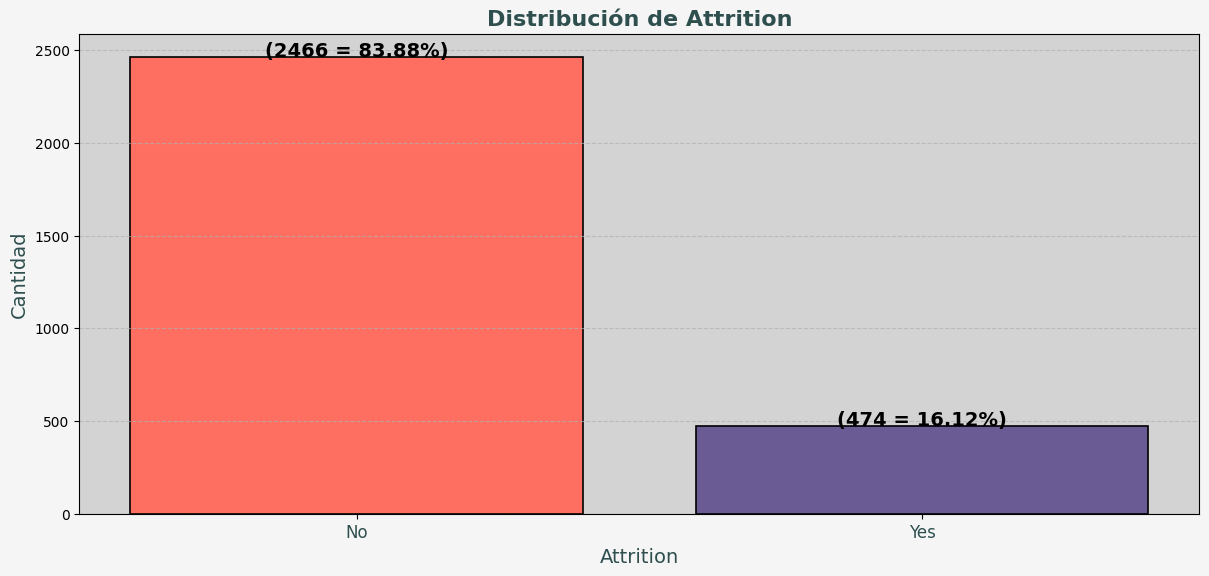

In [73]:
colores = ['#FF6F61', '#6B5B95']  # Rojo coral y azul violeta

# Calcular las proporciones para mostrar los porcentajes
proporciones = df["Attrition"].value_counts(normalize=True) * 100

# Crear la figura con un fondo gris claro
fig, ax = plt.subplots(figsize=(14, 6), facecolor='whitesmoke')
ax.set_facecolor('lightgray')  # Fondo dentro de los ejes

# Contar las ocurrencias de cada clase
counts = df["Attrition"].value_counts()

# Crear las barras con los colores personalizados
ax.bar(counts.index, counts.values, color=colores, edgecolor='black', linewidth=1.2)

# Etiquetas y títulos
ax.set_xlabel('Attrition', fontsize=14, color='darkslategray')
ax.set_ylabel('Cantidad', fontsize=14, color='darkslategray')
ax.set_title('Distribución de Attrition', fontsize=16, fontweight='bold', color='darkslategray')

# Etiquetar las barras con los porcentajes y valores
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_height()
    percentage = f'{y / len(df) * 100:.2f}%'

    # Agregar un margen extra en el valor de y (y + 2) para el texto
    ax.text(x, y + 2, f'({height} = {percentage})', ha='center', fontsize=14, color='black', fontweight='bold')

# Mejorar la legibilidad de las etiquetas del eje X
plt.xticks(fontsize=12, rotation=0, ha='center', color='darkslategray')

# Mejorar la cuadrícula
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño para añadir margen
plt.tight_layout(pad=3.0)

# Ajustar el margen para centrar la gráfica
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Mostrar la gráfica
plt.show()


Podemos ver que se trata de un problema de clasificación binaria y que está desbalanceado, pues actualmente hay muchas más instancias pertenecientes a la clase No que a la clase Yes.

#  DECIDIR CÓMO SE VA A REALIZAR LA EVALUACIÓN

Primero dividiremos nuestros datos entre train y test usando 1/3 parte de los datos para test y 2/3 de los datos para train.

Usaremos principalmente la parte de train en toda la práctica mienstras que test solo se usará en la estimación del rendimiento.

In [74]:
#Dividimos entre train y test

X = df.drop(columns=["Attrition"])
y = df['Attrition'].map({'Yes': 1, 'No': 0})


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=100496072)



numéricas = X_train.select_dtypes(include=['number']).columns
categóricas = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categóricas)
    ],
    remainder='passthrough'
)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get feature names after transformation
feature_names = preprocessor.get_feature_names_out()


X_train = pd.DataFrame(X_train_transformed, index=X_train.index, columns=feature_names)
X_test = pd.DataFrame(X_test_transformed, index=X_test.index, columns=feature_names)

Dummy Classifier:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       822
           1       0.00      0.00      0.00       158

    accuracy                           0.84       980
   macro avg       0.42      0.50      0.46       980
weighted avg       0.70      0.84      0.77       980



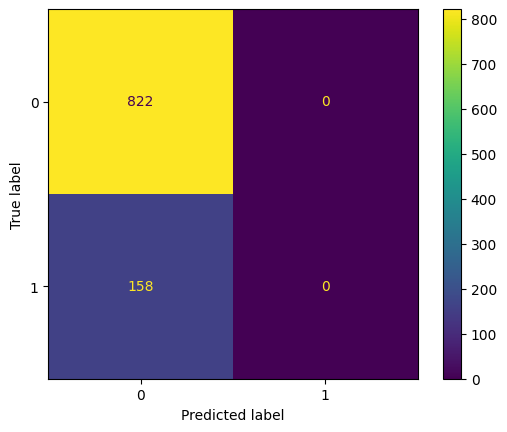

Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       822
           1       0.79      0.21      0.33       158

    accuracy                           0.86       980
   macro avg       0.83      0.60      0.63       980
weighted avg       0.85      0.86      0.83       980



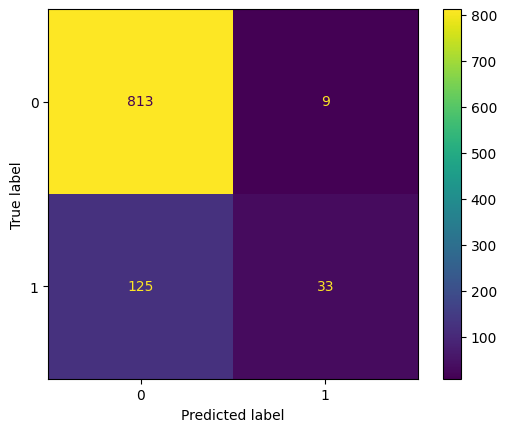

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_dummy_pred = dummy_clf.predict(X_test)
dummy_cr = classification_report(y_test, y_dummy_pred, zero_division=0)
print("Dummy Classifier:\n", dummy_cr)

matrizconfusion = metrics.confusion_matrix(y_test, y_dummy_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrizconfusion, display_labels=dummy_clf.classes_)
disp.plot()
plt.show()

log_reg_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('modelo', LogisticRegression(random_state=100496072))
])

log_reg_pipeline.fit(X_train, y_train)
y_log_pred = log_reg_pipeline.predict(X_test)
log_reg_cr = classification_report(y_test, y_log_pred)

# Imprimir reportes
print("Logistic Regression:\n", log_reg_cr)

matrizconfusion = metrics.confusion_matrix(y_test, y_log_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrizconfusion, display_labels=log_reg_pipeline.classes_)
disp.plot()
plt.show()

In [76]:
#Stratified
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=100496072)

# MÉTODOS BÁSICOS: KNN Y TREES


##Elección de escalado

A continuación elegiremos que métodos de escalado e imputación vamos a usar.
Primero probaremos con escalado MinMax

In [77]:
#Definimos datos necesarios
escalado1 = MinMaxScaler()
escalado2 = StandardScaler()
escalado3 = RobustScaler()
imputacion1 = SimpleImputer(strategy="mean")
imputacion2 = SimpleImputer(strategy="median")


knnn = KNeighborsClassifier()

# Método de escalado MinMax y método de imputación media

# Pipelines para cada tipo de dato
pipeminmax1 = Pipeline([
    ('imputer', imputacion1),
    ('scaler', escalado1),
    ('modelo', knnn)
])

#classi = pipeminmax1.fit(X_train, y_train)  # Hacer esto en todo
# Realizar la validación cruzada

resultado1 = cross_val_score(pipeminmax1, X_train, y_train, scoring='balanced_accuracy', cv=inner).mean()

# Método de escalado MinMax y método de imputación mediana

# Pipelines para cada tipo de dato
pipeminmax2 = Pipeline([
    ('imputer', imputacion2),
    ('scaler', escalado1),
    ('modelo', knnn)
])

resultado2 = cross_val_score(pipeminmax2, X_train, y_train, scoring='balanced_accuracy', cv=inner).mean()


Ahora probaremos escalado estándar

In [78]:
# Método de escalado Estándar y método de imputación media

# Pipelines para cada tipo de dato

pipeestandar1 = Pipeline([
    ('imputer', imputacion1),
    ('scaler', escalado2),
    ('modelo', knnn)
])

resultado3 = cross_val_score(pipeestandar1, X_train, y_train, scoring='balanced_accuracy', cv=inner).mean()


# Método de escalado Estándar y método de imputación mediana

# Pipelines para cada tipo de dato
pipeestandar2 = Pipeline([
    ('imputer', imputacion2),
    ('scaler', escalado2),
    ('modelo', knnn)
])


resultado4 = cross_val_score(pipeestandar2, X_train, y_train, scoring='balanced_accuracy', cv=inner).mean()


Por último toca escalado robusto

In [79]:
# Método de escalado Robusto y método de imputación media

# Pipelines para cada tipo de dato
piperobusto1 = Pipeline([
    ('imputer', imputacion1),
    ('scaler', escalado3),
    ('modelo', knnn)
])


resultado5 = cross_val_score(piperobusto1, X_train, y_train, scoring='balanced_accuracy', cv=inner).mean()


# Método de escalado Robusto y método de imputación mediana

# Pipelines para cada tipo de dato
piperobusto2 = Pipeline([
    ('imputer', imputacion2),
    ('scaler', escalado3),
    ('modelo', knnn)
])


resultado6 = cross_val_score(piperobusto2, X_train, y_train, scoring='balanced_accuracy', cv=inner).mean()

inner_score = {}

inner_score[pipeminmax1] = resultado1
inner_score[pipeminmax2] = resultado2
inner_score[pipeestandar1] = resultado3
inner_score[pipeestandar2] = resultado4
inner_score[piperobusto1] = resultado5
inner_score[piperobusto2] = resultado6

inner_score2 = {
    'MinMax_mean': resultado1,
    'MinMax_median': resultado2,
    'Standard_mean': resultado3,
    'Standard_median': resultado4,
    'Robust_mean': resultado5,
    'Robust_median': resultado6
}

for pipeline, score in inner_score.items():
    print(f"{pipeline}: {score}")

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('modelo', KNeighborsClassifier())]): 0.5759412101617032
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler()),
                ('modelo', KNeighborsClassifier())]): 0.5759412101617032
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('modelo', KNeighborsClassifier())]): 0.5674413533489419
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('modelo', KNeighborsClassifier())]): 0.5674413533489419
Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', RobustScaler()),
                ('modelo', KNeighborsClassifier())]): 0.5867042451190639
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('modelo', KNeighborsClassifier())]): 0.5898788482936671


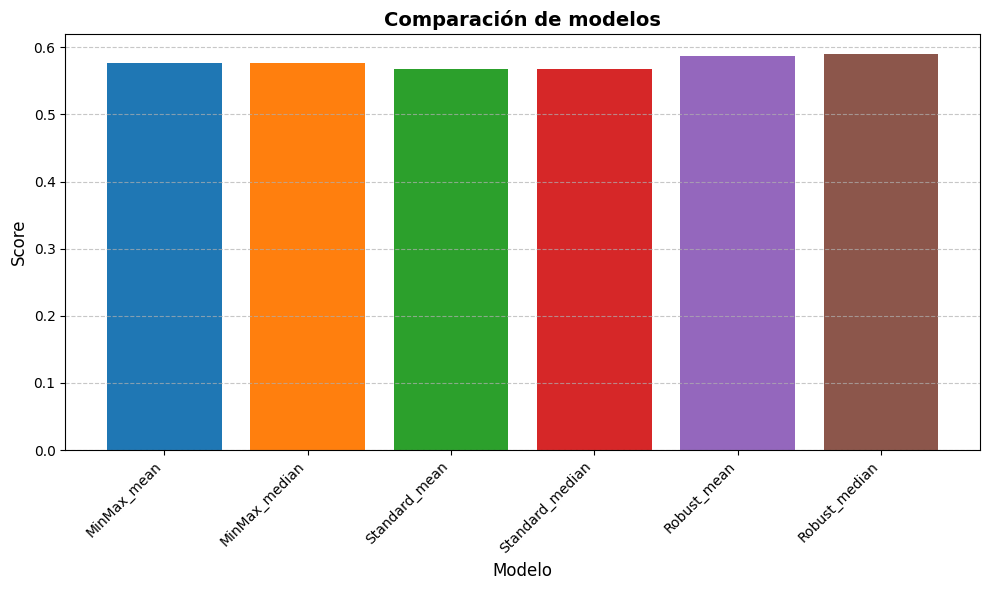


El mejor pipeline es: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('modelo', KNeighborsClassifier())]), 
Score = 0.5898788482936671


In [80]:
# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.bar(inner_score2.keys(), inner_score2.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparación de modelos', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

mejor_pipeline = max(inner_score, key=inner_score.get)
print(f"\nEl mejor pipeline es: {mejor_pipeline}, \nScore = {inner_score[mejor_pipeline]}")

Tras comparar todos los resultados vemos que el mejor método de escalado es el Robusto y que ambos métodos de imputación dan el mismo resultado y consideraremos el método de imputación media


##Evaluación de hiperparámetros

Ahora se evaluarán con sus hiperparámetros por omisión. También se medirán los tiempos que tarda el entrenamiento

In [81]:
knn = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', KNeighborsClassifier())
])

tree = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', DecisionTreeClassifier())
])


inicioknn = time.time()

knn = knn.fit(X_train, y_train)

finknn = time.time()

knn_score = cross_val_score(knn, X_train, y_train, cv=inner, scoring='balanced_accuracy').mean()
print(f"Score: {knn_score}")

print(f"Tiempo de entrenamiento para KNN: {finknn - inicioknn} segundos\n")


iniciotree = time.time()

tree.fit(X_train, y_train)

fintree = time.time()

tree_score = cross_val_score(tree, X_train, y_train, cv=inner, scoring='balanced_accuracy').mean()
print(f"Score: {tree_score}")

print(f"Tiempo de entrenamiento para Árbol de Decisión: {fintree - iniciotree} segundos")


Score: 0.5898788482936671
Tiempo de entrenamiento para KNN: 0.01948833465576172 segundos

Score: 0.7555785638866482
Tiempo de entrenamiento para Árbol de Decisión: 0.03768301010131836 segundos


Ahora vamos a ajustar los hiperparámetros más importantes de cada modelo con GridSearchCV

In [82]:
# Knn

parametrosknn = {
    'modelo__n_neighbors': [2, 3, 5, 7],
    'modelo__weights': ['uniform', 'distance']
}

parametrosarbol = {
    'modelo__max_depth': list(range(2, 20, 2)),  # Probar profundidades del árbol de 2 a 14
    'modelo__min_samples_split': list(range(2, 20, 2))  # Probar valores de min_samples_split entre 2 y 14
}



inicioknn = time.time()

gridknn = GridSearchCV(knn, parametrosknn, cv=inner, scoring='balanced_accuracy', n_jobs=-1)
gridknn.fit(X_train, y_train)

finknn = time.time()

gridknn_score = gridknn.best_score_

print(f"Score: {gridknn_score}")
print(f"Parametos: {gridknn.best_params_}")

print(f"Tiempo de entrenamiento para KNN: {finknn - inicioknn} segundos\n")



# Arbol

iniciotree = time.time()

gridtree = GridSearchCV(tree, parametrosarbol, cv=inner, scoring='balanced_accuracy', n_jobs=-1)
gridtree.fit(X_train, y_train)

fintree = time.time()

gridtree_score = gridtree.best_score_

print(f"Score: {gridtree_score}")

print(f"Parametos: {gridtree.best_params_}")

print(f"Tiempo de entrenamiento para Árbol de Decisión: {fintree - iniciotree} segundos")



Score: 0.7885498302520751
Parametos: {'modelo__n_neighbors': 2, 'modelo__weights': 'distance'}
Tiempo de entrenamiento para KNN: 0.9772663116455078 segundos

Score: 0.7823029317313851
Parametos: {'modelo__max_depth': 14, 'modelo__min_samples_split': 2}
Tiempo de entrenamiento para Árbol de Decisión: 6.859870195388794 segundos


Se explicará mediante plots el efecto de los distintos valores de los hiper-parámetros en el resultado final

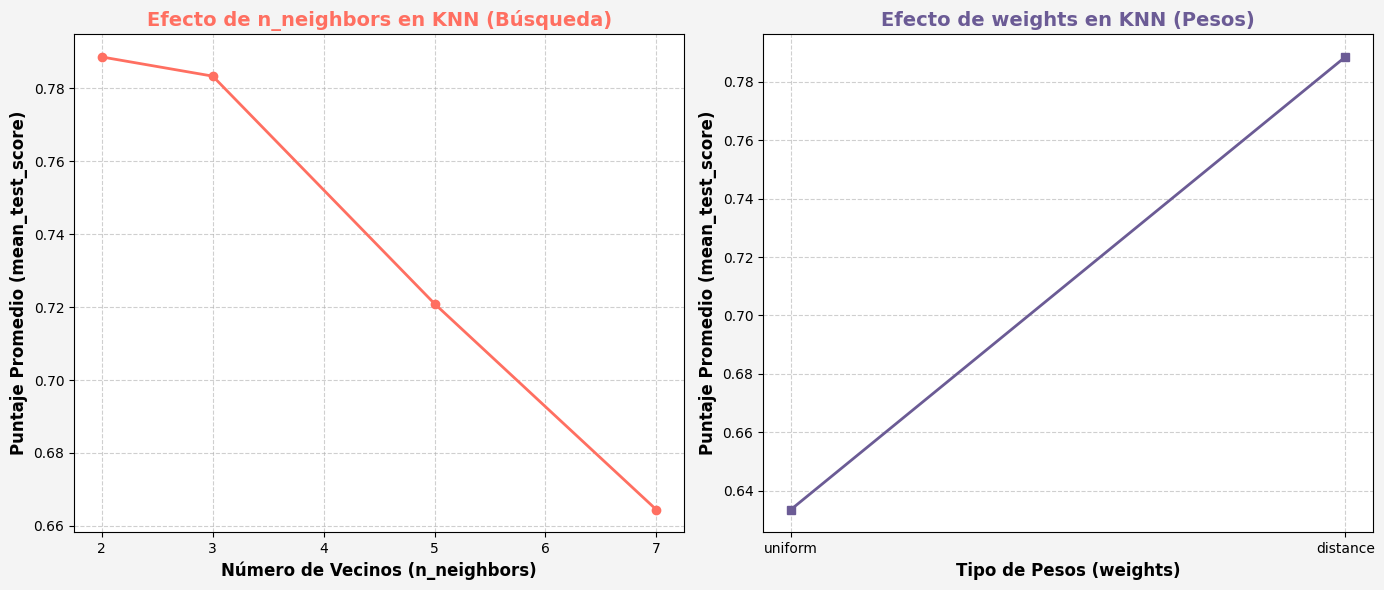

In [83]:
# Convertir resultados en un DataFrame
resultados_knn = pd.DataFrame(gridknn.cv_results_)

# Filtrar por el mejor valor de "weights"
resultados_n_neighbors = resultados_knn[resultados_knn['param_modelo__weights'] == gridknn.best_params_['modelo__weights']]

# Filtrar por el mejor valor de "n_neighbors"
resultados_weights = resultados_knn[resultados_knn['param_modelo__n_neighbors'] == gridknn.best_params_['modelo__n_neighbors']]

# Crear figura con 2 subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="#f4f4f4")  # Fondo gris claro

# Colores personalizados
color_n_neighbors = "#FF6F61"  # Rojo coral
color_weights = "#6B5B95"  # Azul violeta

# Gráfico: Impacto de n_neighbors en el rendimiento
axes[0].plot(resultados_n_neighbors['param_modelo__n_neighbors'], resultados_n_neighbors['mean_test_score'],
             marker='o', linestyle='-', color=color_n_neighbors, markersize=6, linewidth=2)

axes[0].set_xlabel('Número de Vecinos (n_neighbors)', fontsize=12, fontweight='bold', color="black")
axes[0].set_ylabel('Puntaje Promedio (mean_test_score)', fontsize=12, fontweight='bold', color="black")
axes[0].set_title('Efecto de n_neighbors en KNN (Búsqueda)', fontsize=14, fontweight='bold', color=color_n_neighbors)
axes[0].grid(True, linestyle="--", alpha=0.6)

# Gráfico: Impacto de weights en el rendimiento
axes[1].plot(resultados_weights['param_modelo__weights'], resultados_weights['mean_test_score'],
             marker='s', linestyle='-', color=color_weights, markersize=6, linewidth=2)

axes[1].set_xlabel('Tipo de Pesos (weights)', fontsize=12, fontweight='bold', color="black")
axes[1].set_ylabel('Puntaje Promedio (mean_test_score)', fontsize=12, fontweight='bold', color="black")
axes[1].set_title('Efecto de weights en KNN (Pesos)', fontsize=14, fontweight='bold', color=color_weights)
axes[1].grid(True, linestyle="--", alpha=0.6)

# Mejorar diseño
plt.tight_layout()
plt.show()



Como podemos ver, a medida que el número de vecinos aumenta, el score disminuye. Esto implica que cuando aumenta este número, se produce un overfitting en el modelo, haciendo que el balanced accuracy disminuya.

Por otro lado, vemos que el modelo con mejores resultados usa los pesos de los vecinos basándose en la distancia, y que el que toma estos pesos de forma uniforme tiene peor resultado.

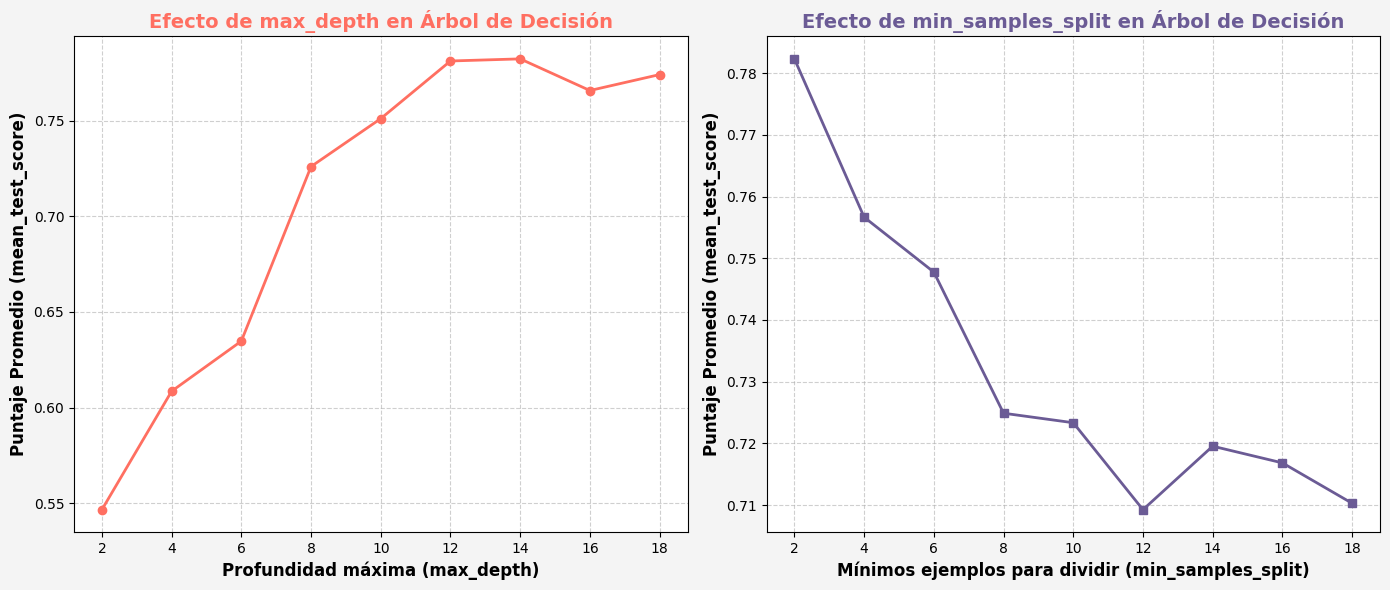

In [84]:
# Convertir resultados en un DataFrame
resultados_arbol = pd.DataFrame(gridtree.cv_results_)

# Filtrar por el mejor valor de "min_samples_split"
resultados_max_depth = resultados_arbol[resultados_arbol['param_modelo__min_samples_split'] == gridtree.best_params_['modelo__min_samples_split']]

# Filtrar por el mejor valor de "max_depth"
resultados_min_samples_split = resultados_arbol[resultados_arbol['param_modelo__max_depth'] == gridtree.best_params_['modelo__max_depth']]

# Colores personalizados
color_max_depth = "#FF6F61"  # Rojo coral
color_min_samples_split = "#6B5B95"  # Azul violeta

# Crear figura con 2 subgráficos en la misma fila
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="#f4f4f4")  # Fondo gris claro

# Gráfico: Impacto de max_depth en el rendimiento
axes[0].plot(resultados_max_depth['param_modelo__max_depth'], resultados_max_depth['mean_test_score'],
             marker='o', linestyle='-', color=color_max_depth, markersize=6, linewidth=2)
axes[0].set_xlabel('Profundidad máxima (max_depth)', fontsize=12, fontweight='bold', color="black")
axes[0].set_ylabel('Puntaje Promedio (mean_test_score)', fontsize=12, fontweight='bold', color="black")
axes[0].set_title('Efecto de max_depth en Árbol de Decisión', fontsize=14, fontweight='bold', color=color_max_depth)
axes[0].grid(True, linestyle="--", alpha=0.6)

# Gráfico: Impacto de min_samples_split en el rendimiento
axes[1].plot(resultados_min_samples_split['param_modelo__min_samples_split'], resultados_min_samples_split['mean_test_score'],
             marker='s', linestyle='-', color=color_min_samples_split, markersize=6, linewidth=2)
axes[1].set_xlabel('Mínimos ejemplos para dividir (min_samples_split)', fontsize=12, fontweight='bold', color="black")
axes[1].set_ylabel('Puntaje Promedio (mean_test_score)', fontsize=12, fontweight='bold', color="black")
axes[1].set_title('Efecto de min_samples_split en Árbol de Decisión', fontsize=14, fontweight='bold', color=color_min_samples_split)
axes[1].grid(True, linestyle="--", alpha=0.6)

# Mejorar diseño
plt.tight_layout()
plt.show()


## Conclusión parámetros KNN

Podemos observar que el parámetro '*max_depth*'  y '*min_sample_split*' actúan de manera inversa, el primero mejora con grandes número, mientras que el *min_sample_split*, cae cuando se va incrementando el número.

## Conclusión de la sección

Se puede observar que sin usar GridSearch, los árboles dan un mejor resultado con el doble de coste (doble de tiempo), aunque ambos son tiempos muy pequeños.

Por otro lado, al usar GridSearch, hemos obtenido un mejor resultado con KNN, que si bien no difiere mucho del resultado con árboles, hemos visto que para dar una solución cercana el coste computacional es mayor, aunque pensamos que debido a la cantidad de parámetros distintos que hay en los árboles, hay muchas más combinaciones posibles para el GridSearch.

De todas formas, ambos resultados son mucho mejores que los modelos triviales como el DummyClassifier.

En cuanto a la comparación entre ajustar los hiperparámetros y valores por omisión, se puede ver como el ajuste hace que el modelo obtenga mucha mejor puntuación, aumentando el coste computacional(tiempo) en un factor de 60, en caso de KNN y 100 en el caso de los árboles.

# AVANZADOS: MODELOS LINEALES Y SVMS

## 1.Hiperparámetros por omisión

Evaluaremos con hiperparámetros por omision

In [85]:

mls = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', LogisticRegression())
])

mlr = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', LogisticRegression(penalty='l1', solver='liblinear'))
])

svm = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', SVC())
])

#Lineal sin regularizar
iniciomls = time.time()

mls.fit(X_train, y_train)

finmls = time.time()

mls_score = cross_val_score(mls, X_train, y_train, cv=inner, scoring='balanced_accuracy').mean()
print(f"Score: {mls_score}")

print(f"Tiempo de entrenamiento para ML: {finmls - iniciomls} segundos\n")


#Lineal regularizado L1

iniciomlr = time.time()

mlr.fit(X_train, y_train)

finmlr = time.time()

mlr_score = cross_val_score(mlr, X_train, y_train, cv=inner, scoring='balanced_accuracy').mean()
print(f"Score: {mlr_score}")

print(f"Tiempo de entrenamiento para ML: {finmlr - iniciomlr} segundos\n")

#SVMs

iniciosvm = time.time()

svm.fit(X_train, y_train)

finsvm = time.time()

svm_score = cross_val_score(svm, X_train, y_train, cv=inner, scoring='balanced_accuracy').mean()
print(f"Score: {svm_score}")

print(f"Tiempo de entrenamiento para SVM: {finsvm - iniciosvm} segundos")



Score: 0.5983637305631522
Tiempo de entrenamiento para ML: 0.039125919342041016 segundos

Score: 0.5939359111408417
Tiempo de entrenamiento para ML: 0.03929758071899414 segundos

Score: 0.5970531301167578
Tiempo de entrenamiento para SVM: 0.11593198776245117 segundos


## 2.Ajuste de hiperparámetros


Ahora evaluaremos con ajuste de hiperparámetros

In [86]:
parametrosml = {
    'modelo__solver': ['liblinear'],
    'modelo__penalty': ['l1', 'l2'],
    'modelo__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}



parametrossvm = {
    'modelo__kernel': ['rbf', 'poly'],
    'modelo__C': [0.01, 0.1, 1, 10, 100],
    'modelo__gamma': ['scale', 'auto', 0.1, 1.01, 5.001]
}


#Lineal
iniciomls = time.time()

gridmls = GridSearchCV(mls, parametrosml, cv=inner, scoring='balanced_accuracy', n_jobs=-1)
gridmls.fit(X_train, y_train)

finmls = time.time()

gridmls_score = gridmls.best_score_
print(f"Score: {gridmls_score}")

print(f"Tiempo de entrenamiento para ML: {finmls - iniciomls} segundos\n")



#SVMs

iniciosvm = time.time()

gridsvm = GridSearchCV(svm, parametrossvm, cv=inner, scoring='balanced_accuracy', n_jobs=-1)
gridsvm.fit(X_train, y_train)

finsvm = time.time()

gridsvm_score = gridsvm.best_score_
print(f"Score: {gridsvm_score}")

print(f"Tiempo de entrenamiento para SVM: {finsvm - iniciosvm} segundos")



Score: 0.6028731448508339
Tiempo de entrenamiento para ML: 2.2434966564178467 segundos

Score: 0.8233975599145685
Tiempo de entrenamiento para SVM: 18.483753204345703 segundos


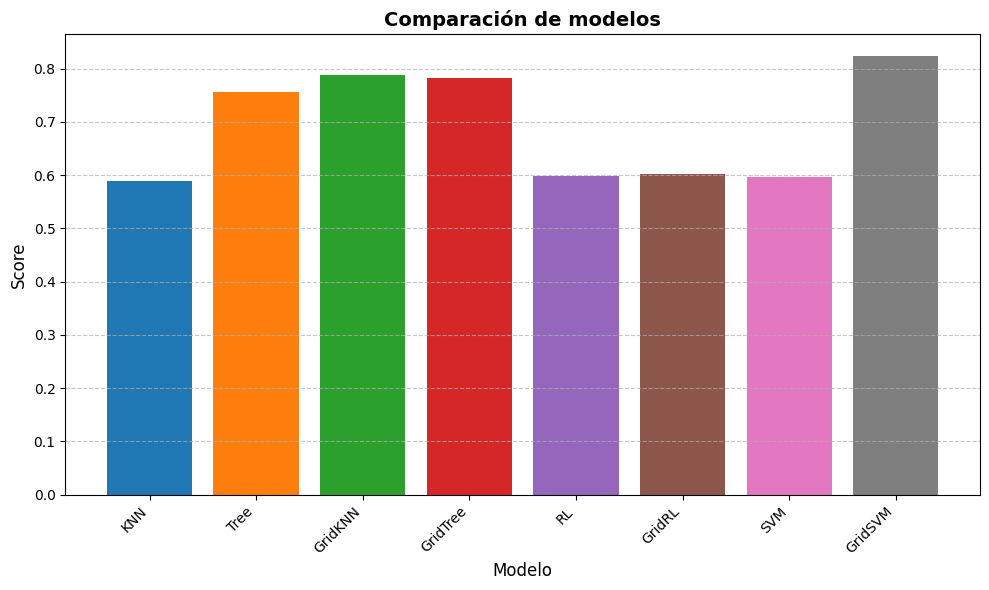


La mejor elección es: Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()), ('modelo', SVC(C=100))]), 
Score = 0.8233975599145685


In [87]:
inner_score_global = {}

inner_score_global[knn] = knn_score
inner_score_global[tree] = tree_score
inner_score_global[gridknn.best_estimator_] = gridknn_score
inner_score_global[gridtree.best_estimator_] = gridtree_score
inner_score_global[mls] = mls_score
inner_score_global[mlr] = mlr_score
inner_score_global[svm] = svm_score
inner_score_global[gridmls.best_estimator_] = gridmls_score
inner_score_global[gridsvm.best_estimator_] = gridsvm_score


inner_score_global2 = {
    'KNN': knn_score,
    'Tree': tree_score,
    'GridKNN': gridknn_score,
    'GridTree': gridtree_score,
    'RL': mls_score,
    'GridRL': gridmls_score,
    'SVM': svm_score,
    'GridSVM': gridsvm_score
}

# Gráfico de comparación
plt.figure(figsize=(10, 6))
plt.bar(inner_score_global2.keys(), inner_score_global2.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparación de modelos', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#mejor_pipeline = max(inner_score, key=inner_score.get)
#print(f"\nEl mejor pipeline es: {mejor_pipeline}, \nScore = {inner_score[mejor_pipeline]}")

mejor_eleccion = max(inner_score_global, key=inner_score_global.get)
print(f"\nLa mejor elección es: {mejor_eleccion}, \nScore = {inner_score_global[mejor_eleccion]}")

## 3.¿Es posible extraer de alguna técnica qué atributos son más relevantes? ¿Cuáles son?.

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


model = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', RandomForestClassifier(n_estimators=100, random_state=100496072))
])

# Ajustar el modelo
model.fit(X_train, y_train)

# Acceder al estimador RandomForestClassifier dentro del pipeline
rf_estimator = model.named_steps['modelo']

# Acceder a la importancia de las características
importances = rf_estimator.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,  # Usar las columnas de X_train como nombres de características
    'Importance': importances
})

# Ordenar por importancia
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

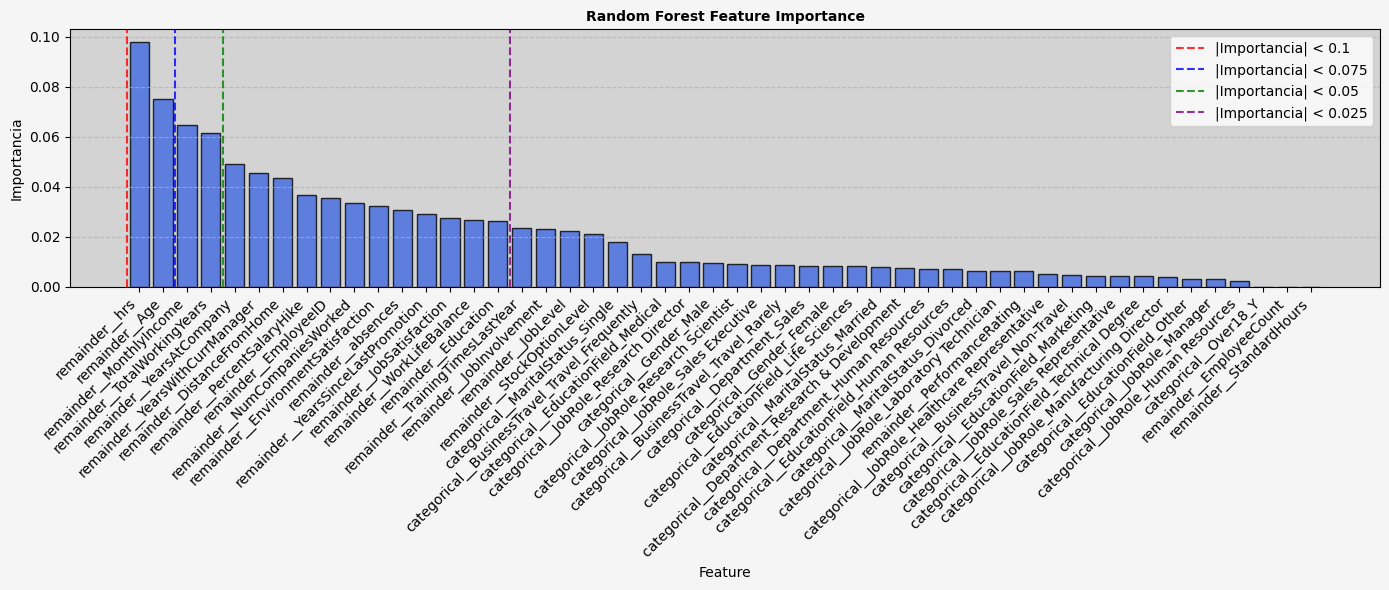

In [89]:

# Data
features = feature_importances['Feature']
importances = feature_importances['Importance']

# Colors: blue for positive, red for negative (can be adjusted)
colors = np.where(importances >= 0, 'royalblue', 'crimson')

# Sort importances by absolute value (not necessary since already sorted)
# sorted_features = feature_importances.reindex(feature_importances['Importance'].abs().sort_values(ascending=False).index)

# Find the positions where |coef| < 1, 0.75, 0.5, 0.25 (adjust thresholds if needed)
thresholds = [0.1, 0.075, 0.05, 0.025]
split_indices = {t: next((i for i, imp in enumerate(feature_importances['Importance'].abs()) if imp < t), len(features)) for t in thresholds}


# Create the figure with a light gray background and axes with another tone
fig, ax = plt.subplots(figsize=(14, 6), facecolor='whitesmoke')
ax.set_facecolor('lightgray')  # Background of the graph (within the axes)

# Bars
ax.bar(features, importances, color=colors, alpha=0.8, edgecolor='black')

# Labels
ax.set_xlabel('Feature', fontsize=10)
ax.set_ylabel('Importancia', fontsize=10)  # Changed to 'Importance'
ax.set_title('Random Forest Feature Importance', fontsize=10, fontweight='bold')  # Changed title
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Vertical lines at thresholds (adjust colors and labels if needed)
# Adjusted to work with importances instead of coefficients
ax.axvline(x=split_indices[0.1] - 0.5, color='red', linestyle='--', linewidth=1.5, alpha=0.8, label='|Importancia| < 0.1')
ax.axvline(x=split_indices[0.075] - 0.5, color='blue', linestyle='--', linewidth=1.5, alpha=0.8, label='|Importancia| < 0.075')
ax.axvline(x=split_indices[0.05] - 0.5, color='green', linestyle='--', linewidth=1.5, alpha=0.8, label='|Importancia| < 0.05')
ax.axvline(x=split_indices[0.025] - 0.5, color='purple', linestyle='--', linewidth=1.5, alpha=0.8, label='|Importancia| < 0.025')

# Rotate X-axis labels and adjust size
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show legend
plt.legend()

plt.tight_layout()
plt.show()

Para obtener la importancia de las features,  decidimos usar RandomForest, pues este modelo ya calcula la importancia de las features, pues trabaja con árboles.

Como era obvio, aquellas features que son constantes y de las que ya se ha hablado en el apartado del EDA, no aportan nada, tienen coeficiente 0.

Encontramos que las features más importantes son: hrs, age, MonthlyIncome, YearsAtCompany, Year_With_Current_Manager, DistanceFromHome y PercentSalaryHike, entre otros.

También podemos ver cosas un poco más raras, como que el Id del empleado sea un atributo "importante", lo que recalca la importancia de hace feature selection, pues algunas de estas empeoran nuestros modelos, afectando a la capacidad de predecir.

# RESULTADOS Y MODELO FINAL

Para el modelado final tras haber realizado el correspondiente análisis con KNN,Trees, Modelos Lineales y SVM con omisión y ajuste de parámetros elegimos el que mejor evaluación interna tiene.
<br>
Tras esto, comprobramos cual es la evaluación externa y entrenamos con todos los datos.

In [90]:
import joblib
y_pred_test = mejor_eleccion.predict(X_test)
print("Precisión:", balanced_accuracy_score(y_test, y_pred_test))


mejor_modelo = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', mejor_eleccion['imputer']),
    ('scaler', mejor_eleccion['scaler']),
    ('modelo', mejor_eleccion['modelo'])
])


mejor_modelo.fit(X, y)

joblib.dump(mejor_modelo, 'modelo_final_100496633_100496072.pkl')

# Predecir con el modelo entrenado utilizando el conjunto completo
y_pred_completo = mejor_modelo.predict(X)

# Evaluar la precisión sobre todo el conjunto de datos
print("Precisión en el conjunto completo:", balanced_accuracy_score(y, y_pred_completo))

# Almacenar el modelo final (puedes guardarlo si es necesario)
modelo_final = mejor_modelo

Precisión: 0.8795081462317904
Precisión en el conjunto completo: 1.0


# TAREA DE ELECCIÓN ABIERTA

Para esta tarea, hemos decidido probar a tener un modelo de clasificación basado en redes de neuronas. En concreto usaremos MLPClasiffier, un modelo de perceptrón multicapa.

In [91]:
mlp_pipeline = Pipeline([
    ('imputer', mejor_pipeline['imputer']),
    ('scaler', mejor_pipeline['scaler']),
    ('modelo', MLPClassifier(max_iter=500,random_state=100496072))
])

# Espacio de búsqueda
param_dist = {
    'modelo__hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 25)],
    'modelo__alpha': uniform(1e-6, 1e-2),
    'modelo__learning_rate_init': uniform(1e-4, 1e-1),
    'modelo__activation': ['relu', 'tanh'],
    'modelo__solver': ['adam', 'sgd','lbfgs'],
}

# Métrica
scorer = make_scorer(balanced_accuracy_score)

# Búsqueda eficiente
halving_search = HalvingRandomSearchCV(
    estimator=mlp_pipeline,
    param_distributions=param_dist,
    scoring=scorer,
    n_candidates=20,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    random_state=42,
    n_jobs=-1,
    verbose=2
)
inicio = time.time()
# Entrenamiento
halving_search.fit(X_train, y_train)
fin = time.time()
print(f"Tiempo de entrenamiento para ML: {fin - inicio} segundos\n")
# Resultados
print("Mejores parámetros encontrados:")
print(halving_search.best_params_)

y_pred = halving_search.predict(X_test)
print("Balanced Accuracy en test:", balanced_accuracy_score(y_test, y_pred))

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 5
min_resources_: 20
max_resources_: 1960
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 20
n_resources: 20
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 7
n_resources: 60
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 2
n_candidates: 3
n_resources: 180
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Tiempo de entrenamiento para ML: 6.108746767044067 segundos

Mejores parámetros encontrados:
{'modelo__activation': 'tanh', 'modelo__alpha': np.float64(0.0033380861113902188), 'modelo__hidden_layer_sizes': (50, 25), 'modelo__learning_rate_init': np.float64(0.07090725777960455), 'modelo__solver': 'sgd'}
Balanced Accuracy en test: 0.8667267239520773


En un principio para este apartado se decidió realizar un gridsearch con MPL, pero el tiempo que tardaba en realizar todas las comprobaciones era muy grande y no conseguía mejoría con respecto a la solución de gridSVM.

Tras esto, pensamos en realizar una optimización bayesiana, pues queríamos quitar búsquedas en un espacio de parámetros innecesario. Encontramos para ello HalvingGridSearch, un método que nos permite optimizar la búsqueda de hiperparámetros.

Tras hacer varias pruebas, y cambiando por un HarvingRandomSearch, vimos que obteníamos mejores resultados y reduciendo el tiempo de ejecución del orden del minuto y medio a apenas 10 segundos.

Y así llegamos a este modelo, que consigue una precisión cercana a la del gridSVM tardando entre un 30% y un 50% menos.  

# DECLARACIÓN DE USO DE LA IA

Se ha usado de forma selectiva y puntual para embellecer y esclarecer la estética de las gráficas, y para resolver errores que no hemos podido solucionar con los manuales o los tutoriales encontrados en la red.

** Cabe destacar que toda la parte gráfica y de impresión de datos y valores ha sido reformulada por parte de ChatGPT de cara a hacer la información más fácil de leer.
Esto se ha realizado con el previo consentimiento del profesor de prácticas.
Se puede revisar desde GitHub las versiones anteriores que contienen el código original sin refactorizar por parte de ChatGPT**

Además se ha hecho uso de la IA Gemini de Google, integrada en Google Colab para explicación de errores y autocompletado de código (supervisado).